In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start = '1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6897 entries, 1995-01-03 to 2022-05-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6897 non-null   float64
 1   MSFT    6897 non-null   float64
 2   F       6897 non-null   float64
 3   GE      6897 non-null   float64
dtypes: float64(4)
memory usage: 269.4 KB


In [5]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.926652,2.364447,4.307286,32.847820
1995-01-04,7.863112,2.381635,4.423177,32.847820
1995-01-05,7.751910,2.342349,4.384547,32.928326
1995-01-06,7.767797,2.381635,4.384547,32.767296
1995-01-09,7.736027,2.366902,4.461808,32.445282


In [6]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-05-17,154.679993,266.200012,13.53,76.400002
2022-05-18,145.039993,254.080002,12.78,75.199997
2022-05-19,141.699997,253.139999,12.85,75.739998
2022-05-20,141.789993,252.559998,12.50,75.250000
2022-05-23,145.050003,260.649994,12.83,75.459999


In [7]:
mydata.iloc[0]

PG       7.926652
MSFT     2.364447
F        4.307286
GE      32.847820
Name: 1995-01-03 00:00:00, dtype: float64

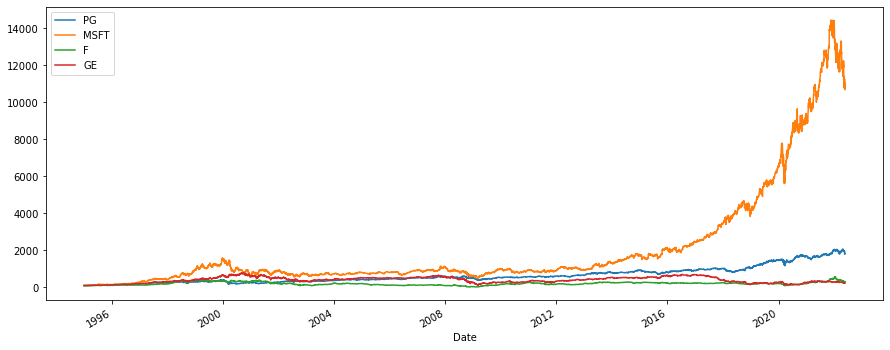

In [10]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

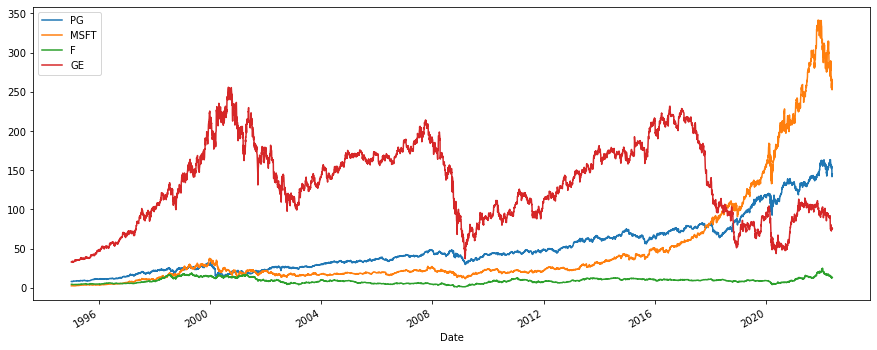

In [11]:
mydata.plot(figsize=(15,6))
plt.show()

In [12]:
mydata.loc['1995-01-03']

PG       7.926652
MSFT     2.364447
F        4.307286
GE      32.847820
Name: 1995-01-03 00:00:00, dtype: float64

In [13]:
mydata.iloc[0]

PG       7.926652
MSFT     2.364447
F        4.307286
GE      32.847820
Name: 1995-01-03 00:00:00, dtype: float64

# Calculating the Return of a Portfolio of Securities

In [16]:
returns = (mydata / mydata.shift(1)) -1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009827


In [17]:
weights = np.array([0.25,0.25,0.25,0.25])

In [18]:
np.dot(returns , weights)

array([        nan,  0.0065398 , -0.00923003, ..., -0.00351738,
       -0.00884074,  0.02105362])

In [19]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.130473
MSFT    0.219667
F       0.120195
GE      0.081725
dtype: float64

In [20]:
np.dot(annual_returns, weights)

0.13801499045957832

In [21]:
pfolio_1 = str(round(np.dot(annual_returns,weights), 5) * 100) + '%'
pfolio_1

'13.801%'

In [22]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [24]:
pfolio_2 = str(round(np.dot(annual_returns,weights_2), 5) * 100) + '%'
print (pfolio_1)
print (pfolio_2)

13.801%
16.217000000000002%
